# Supplemental Figure 2

## Caption
Average tributary derived phosphorus concentration for May, June, July, and August for each simulated year (2007, 2008, 2009, and 2010).  

In [1]:
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

import numpy as np
import xarray as xr
import pandas as pd
import cmocean
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.lines import Line2D

# Load data

In [2]:
%run _load_directories.ipynb

DIRECTORIES
>> {dir_raw}
/local/data/artemis/workspace/gloege/MITgcm-Michigan-Phosphorus/data/raw

>> {dir_clean}
/local/data/artemis/workspace/gloege/MITgcm-Michigan-Phosphorus/data/clean

>> {dir_figs}
/local/data/artemis/workspace/gloege/MITgcm-Michigan-Phosphorus/results/figures


In [3]:
### Load data
ds_grid = xr.open_dataset(f'{dir_raw}/grid_lake_michigan.nc')
ds = xr.open_dataset(f'{dir_clean}/phosphorus_monthly_avg_MJJA_2007-2010.nc')

# Generate Figure

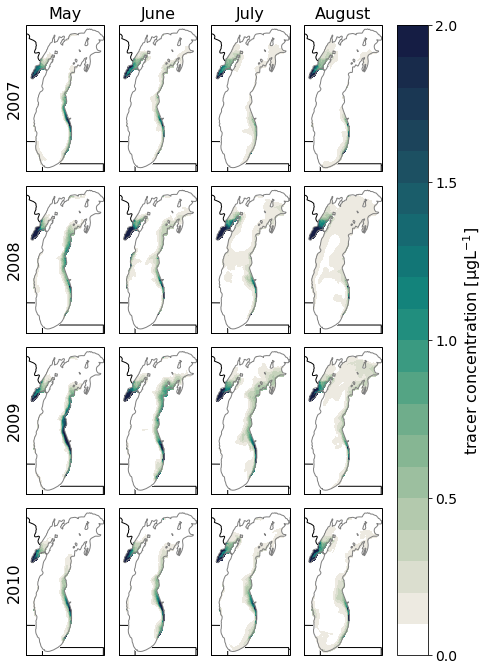

In [6]:
fig = plt.figure(figsize=(7.2, 7.2*1.618))
projection = ccrs.Mercator()
axes_class = (GeoAxes, dict(map_projection=projection))
grid = AxesGrid(fig, 111, 
                axes_class = axes_class,
                share_all=False,
                nrows_ncols = (4, 4),
                axes_pad = 0.2,
                cbar_location = 'right',
                cbar_mode = 'single',
                cbar_pad = 0.2,
                cbar_size = '10%',
                label_mode = '')  # note the empty label_mode

### Need to set projection of ticks 
### to make labeling work
### Really hacky way to make labels work 
### with AxesGrid-GeoAxes
for ax in grid:
    ax.set_xticks(ax.get_xticks(),crs=projection)
    ax.set_yticks(ax.get_yticks(),crs=projection)
    
### Set y labels
grid[0].axes.yaxis.set_label_text('2007', fontsize=16) 
grid[4].axes.yaxis.set_label_text('2008', fontsize=16) 
grid[8].axes.yaxis.set_label_text('2009', fontsize=16) 
grid[12].axes.yaxis.set_label_text('2010', fontsize=16) 

### set titles
grid[0].set_title('May', fontsize=16)
grid[1].set_title('June', fontsize=16)
grid[2].set_title('July', fontsize=16)
grid[3].set_title('August', fontsize=16)

### ==============================================================
### Set boundary
### ==============================================================
for ax in grid:
    ax.set_extent([-84.75, -88.25, 41.5, 46.25]) ### Michigan

### ==============================================================
### Create a feature for States/Admin 1 
### regions at 1:50m from Natural Earth
### ==============================================================
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
for ax in grid:
    ax.add_feature(states_provinces, 
                   edgecolor='black', 
                   facecolor='none', 
                   zorder=1)


### ==============================================================
### Create a feature for lakes at 1:50m from Natural Earth
### ==============================================================
lakes_50m = cfeature.NaturalEarthFeature(
    category='physical',
    name='lakes',
    scale='10m',
    facecolor='none')
for ax in grid:
    ax.add_feature(lakes_50m, 
                   edgecolor=(0.5,0.5,0.5), 
                   facecolor='none', 
                   zorder=2)
    
# define the colormap
vmin, vmax = 0, 2
cmap = cmocean.cm.tempo
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (1,1,1,1.0)
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0,2,21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

### There is probably a more elegant way to do this
### but an "outside loop" can loop over axes
pos = 0
for i, yr in enumerate([2007, 2008, 2009, 2010]):
    for j, mon in enumerate(['may', 'june', 'july', 'august']): 
        #print(pos)
        sub = grid[pos].pcolormesh(ds['X'].values, 
                        ds['Y'].values, 
                        np.ma.masked_array(ds['phos_monthly'].
                            where((ds['year']==yr) & (ds['months']==mon), 
                                  drop=True).squeeze().values, 
                            mask=(ds_grid['Depth'].values==0)),
                        cmap = cmap, 
                        norm = norm,
                        vmin = vmin, 
                        vmax = vmax,
                        transform=ccrs.PlateCarree(),
                        zorder = 2)
        ### update position
        pos = pos + 1

### ==============================================================
### Add colorbar
### Better to use plt with reference to cax 
### than to grid.cbar_axes[0].colorbar(sub)
### since it is clunky as all get
### ==============================================================
cbar = plt.colorbar(sub, cax=grid.cbar_axes[0])
cbar.set_label(r'tracer concentration [$\rm \mu g L^{-1}$]', fontsize=16)
cbar.set_ticks(np.arange(0, 2.5, 0.5))
cbar.ax.tick_params(labelsize=14) 


In [7]:
fig.savefig(f'{dir_figs}/Supplemental_Figure_2.pdf', bbox_inches='tight',pad_inches=0)

In [8]:
fig.savefig(f'{dir_figs}/Supplemental_Figure_2.png', bbox_inches='tight',pad_inches=0)